## Arbitary value imputation 

this technique was derived from kaggle completition it consist of replacing NaN by an arbitary value

it consist of replacing NaN Value by an arbitary  value

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def imput_nan(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)

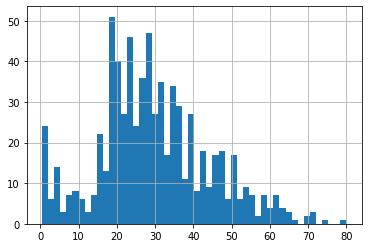

In [4]:
df['Age'].hist(bins=50)

### Arbitary values

1. It should be more frequently present

#### Advatages
-Easy to implemet
-Captures the importance of missingness if there is one

#### Disadvatages
-Distorts the original distribution of the variable

-If missingness is not importance,it may mask the predictive power of the original variable by distortic its distribution

-hard to decide which value to use

# How to Handle Categorical Missing Values

## Frequent Category Imputation

In [5]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [6]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [7]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [8]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

### Compute the frequency with every feature

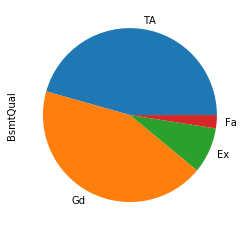

In [9]:
df['BsmtQual'].value_counts().plot.pie()

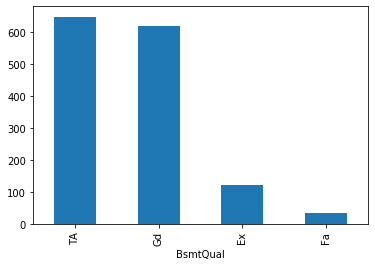

In [10]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

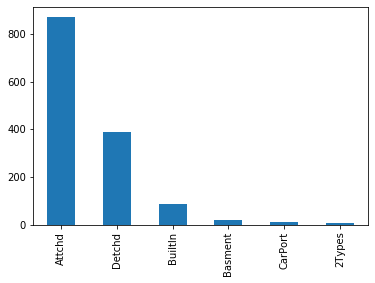

In [11]:
df['GarageType'].value_counts().plot.bar()

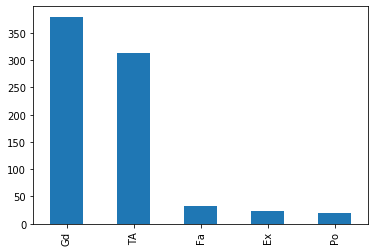

In [12]:
df['FireplaceQu'].value_counts().plot.bar()

In [13]:
#you can also use
df['GarageType'].mode()[0]

'Attchd'

In [14]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [15]:
### Replacing Function 

def imput_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)
    

In [16]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    imput_nan(df,feature)

In [17]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [18]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

## Advantages

Easy to implement
Faster way to implement

## Disadvantage

since we are using most freuent labels, it may use them in an over represent way
it distorts the relationship of  the most frequent label

## Ading  a variable to capture the NaN

In [19]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [20]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [21]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [22]:
frequent=df['BsmtQual'].mode()[0]

In [23]:
df['BsmtQual'].fillna(frequent, inplace=True)

In [24]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [25]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)

In [26]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Suppose you have more frequent categories,we just replace NAN with a new category

In [27]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [28]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [31]:
def imput_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [32]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    imput_nan(df,feature)

In [33]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [34]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
